In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# metrics for validation
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# ignore the harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
# target data
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# array for the first data image
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

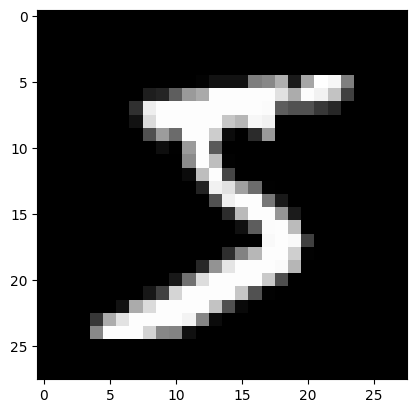

In [ ]:
plt.imshow(x_train[0], cmap='grey')
plt.show()

In [ ]:
def rdm_sample_img(x, y):
    rdm_img = random.randint(0, len(x))
    plt.figure(figsize=(10, 3))
    plt.imshow(x[rdm_img])
    plt.show()
    print('The class label for the image is:', y[rdm_img])

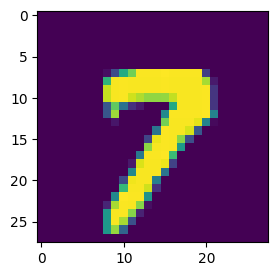

The class label for the image is: 7


In [ ]:
# function call for training data
rdm_sample_img(x_train, y_train)

In [ ]:
# scaling the data
x_train = x_train/255
x_test = x_test/255

In [ ]:
# reshape the image into 4 dimensions - [# no of image, # rows, # columns, # layers]

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [ ]:
# Building the hyper model

def hyper_model(hp):
    model = Sequential([
        Conv2D(filters = hp.Int('conv_1_filters', min_value=32, max_value=128, step=4),
               kernel_size = hp.Choice('conv_1_kernel', values=[3, 4, 5]),
               activation='relu',
               input_shape = (28, 28, 1)),
        Conv2D(filters = hp.Int('conv_2_filters', min_value=8, max_value=64, step=2),
               kernel_size = hp.Choice('conv_2_kernel', values=[3, 4, 5]),
               activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),

        Dense(units=hp.Int('dense_1_units', min_value=32, max_value=256, step=2),
              activation = hp.Choice('dense_1_activation', ['relu', 'tanh'])),
        Dense(units=hp.Int('dense_2_units', min_value=32, max_value=126, step=2),
              activation = hp.Choice('dense_2_activation', ['relu', 'tanh'])),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch


In [ ]:
tuner_output = RandomSearch(hyper_model,
                            objective='val_accuracy',
                            max_trials=5,
                            project_name='Mnist optimisation')

In [ ]:
tuner_output.search(x_train, y_train, epochs=10, validation_split=0.2)

Trial 5 Complete [00h 01m 25s]
val_accuracy: 0.9883333444595337

Best val_accuracy So Far: 0.9894166588783264
Total elapsed time: 00h 07m 31s


In [ ]:
# extracting the best model so far
final_model = tuner_output.get_best_models(num_models=1)[0]

In [ ]:
# best model summary
final_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 120)    │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 38)     │        41,078 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 38)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4598)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 232)            │     1,066,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        22,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,134,504 (4.33 MB)

 Trainable params: 1,134,504 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fitting the data onto the final model
final_model.fit(x_train, y_train, epochs=12, initial_epoch=10, validation_split=0.2)

Epoch 11/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9983 - loss: 0.0058 - val_accuracy: 0.9864 - val_loss: 0.0542
Epoch 12/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9974 - loss: 0.0068 - val_accuracy: 0.9877 - val_loss: 0.0499


In [ ]:
# model evaluation
final_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9879 - loss: 0.0494


[0.037690237164497375, 0.9909999966621399]

In [ ]:
# predictions
y_pred = final_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
y_pred

array([[2.9980516e-09, 8.1437224e-07, 1.4517553e-07, ..., 9.9999809e-01,
        4.7469033e-09, 2.2510223e-07],
       [7.7524664e-06, 3.6326662e-06, 9.9998522e-01, ..., 1.9740342e-07,
        2.8844150e-07, 4.5632871e-09],
       [9.2667896e-08, 9.9999869e-01, 3.2845568e-09, ..., 4.1746733e-07,
        4.1054102e-07, 4.6240031e-10],
       ...,
       [8.0934086e-11, 3.4980908e-07, 6.7213257e-08, ..., 8.0082327e-07,
        1.7212640e-06, 5.7112279e-06],
       [1.2146285e-09, 1.4243503e-08, 6.1637349e-13, ..., 3.7066094e-08,
        2.0124149e-07, 1.5979738e-08],
       [3.1371721e-07, 6.4720246e-10, 2.8642386e-08, ..., 1.3354741e-09,
        5.7931871e-08, 1.8212146e-12]], dtype=float32)

In [ ]:
y_class = [np.argmax(ele) for ele in y_pred]

In [ ]:
y_class

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(5),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(4),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(3),
 np.int64(7),
 np.int64(4),
 np.int64(6),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

In [ ]:
# printing the first five output
print('The actual label for first 5 images:', list(y_test[0:5]))
print('The predicted label for first 5 images:', y_class[0:5])

The actual label for first 5 images: [np.uint8(7), np.uint8(2), np.uint8(1), np.uint8(0), np.uint8(4)]
The predicted label for first 5 images: [np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]


In [ ]:
def validate_rdm_img():

    rdm_img = random.randint(0, len(x_test))
    plt.imshow(x_test[rdm_img], cmap='grey')
    plt.show()

    print('Actual Image is:', [y_test[rdm_img]])
    print('Predicted Image is:', [y_class[rdm_img]])
    print('Predicted Image probability:', round(y_pred[rdm_img][y_class[rdm_img]]*100, 2), '%')

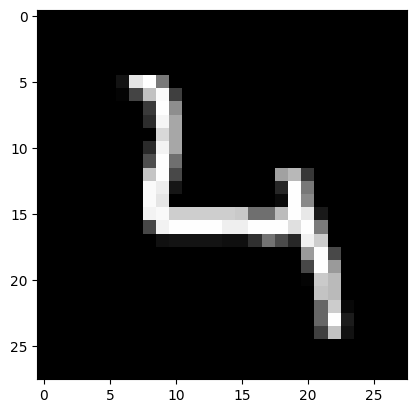

Actual Image is: [np.uint8(4)]
Predicted Image is: [np.int64(4)]
Predicted Image probability: 99.99 %


In [ ]:
validate_rdm_img()

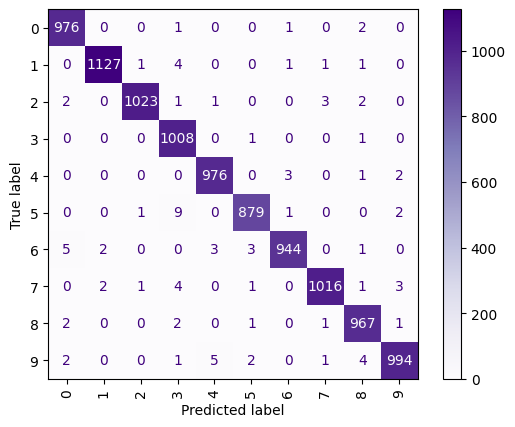

In [ ]:
# validation metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_class,
                                             xticks_rotation='vertical', cmap='Purples')

In [ ]:
# classification report
report = classification_report(y_test, y_class)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

